In [116]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, precision_score, classification_report

In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt


In [26]:
data = load_iris()

In [42]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [43]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [44]:
df["Target"] = data.target

In [45]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  149 non-null    float64
 1   sepal width (cm)   149 non-null    float64
 2   petal length (cm)  149 non-null    float64
 3   petal width (cm)   149 non-null    float64
 4   Target             149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 7.0 KB


In [49]:
df.duplicated().sum()

np.int64(0)

In [48]:
df = df.drop_duplicates()

In [51]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


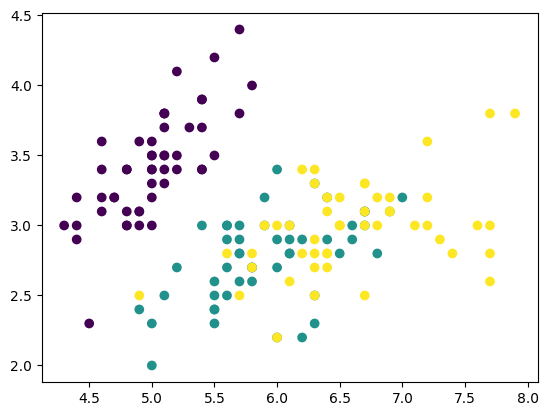

In [59]:
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"], c=df["Target"])

In [65]:
dct = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [67]:
df["Species"] = df["Target"].map(lambda x : dct[x])

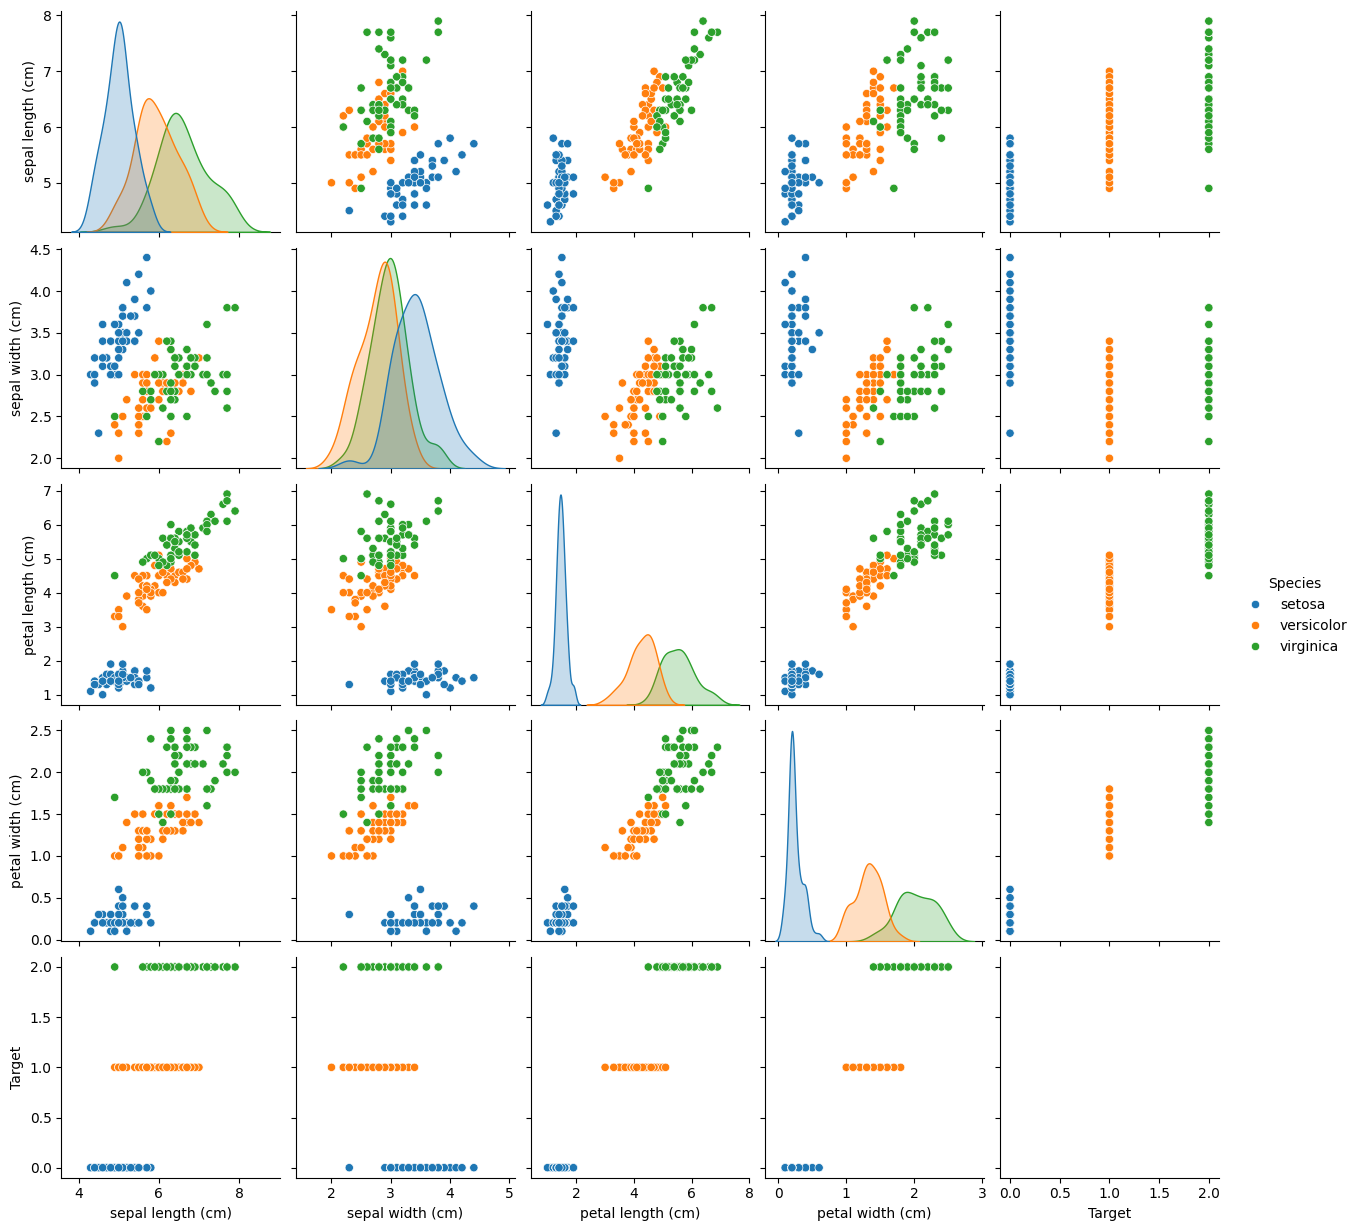

In [68]:
sns.pairplot(df, hue = "Species")

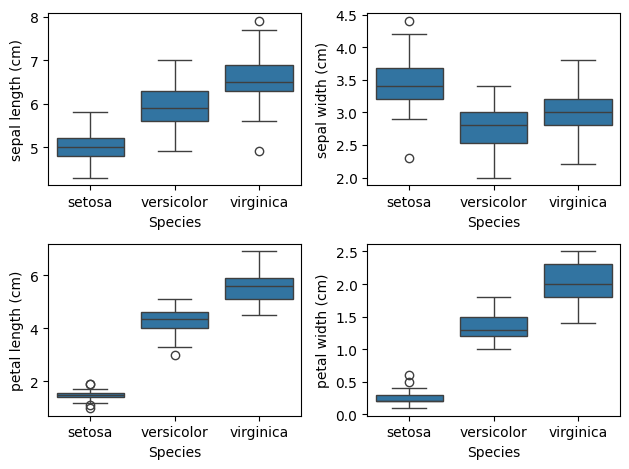

In [101]:
plt.subplot(2, 2,1)
sns.boxplot(data = df, x ="Species",y = "sepal length (cm)")

plt.subplot(2, 2,2)
sns.boxplot(data = df, x ="Species",y = "sepal width (cm)")

plt.subplot(2, 2,3)
sns.boxplot(data = df, x ="Species",y = "petal length (cm)")

plt.subplot(2, 2,4)
sns.boxplot(data = df, x ="Species",y = "petal width (cm)")

plt.tight_layout()
plt.show()

In [104]:
x = df.drop(columns="Species").iloc[:, :-1]
y = df["Target"]

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y)

In [110]:
model = LogisticRegression()

In [111]:
model.fit(xtrain, ytrain)

LogisticRegression()

In [112]:
model.score(xtest, ytest)

1.0

In [113]:
ypred = model.predict(xtest)

In [115]:
accuracy_score(ytest, ypred)

1.0

In [133]:
pd.DataFrame(classification_report(ytest, ypred, target_names=dct.values(), output_dict=True, labels=[0,1,2])).T

,precision,recall,f1-score,support
setosa,1.0,1.0,1.0,13.0
versicolor,1.0,1.0,1.0,16.0
virginica,1.0,1.0,1.0,9.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,38.0
weighted avg,1.0,1.0,1.0,38.0


In [145]:
confusion_matrix = pd.DataFrame(confusion_matrix(ytest, ypred, labels=[0,1,2]))

In [146]:
confusion_matrix

,0,1,2
0,13,0,0
1,0,16,0
2,0,0,9


<Axes: >

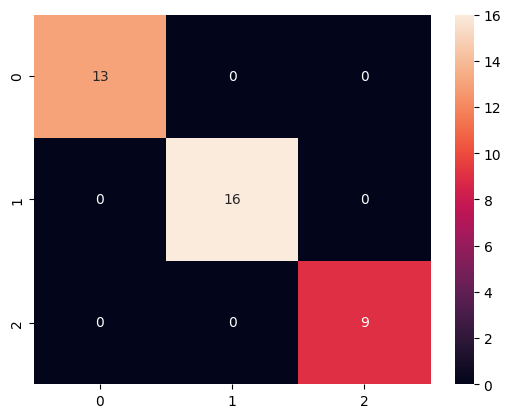

In [147]:
sns.heatmap(confusion_matrix, annot=True, )